In [30]:
import numpy as np
import pandas as pd 
import torch
import torchvision
import torch.nn.functional as F
import os
import cv2
% matplotlib inline

In [31]:
DATA_DIR = r"/Users/takahashiyuudai/Documents/Data/cassava-leaf-disease-classification"
CSV_PATH = 'train.csv'
TRAIN_DIR = 'train_images'

In [32]:
df = pd.read_csv(os.path.join(DATA_DIR, CSV_PATH))
df

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


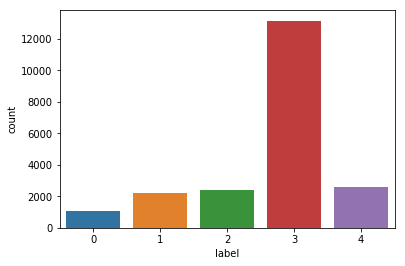

In [33]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
# 画像の可視化
import matplotlib.pyplot as plt
import cv2

train_images = []
for image_path in df['image_id']:
    train_dir = os.path.join(DATA_DIR, TRAIN_DIR)
    image = cv2.imread(os.path.join(train_dir, image_path))
#     print(image.shape)
    train_images.append(image)

train_images = np.array(train_images)
print(train_images.shape)

In [49]:
# 畳み込み層
# conv2d(入力チャネル, 出力チャネル, カーネルサイズ)
# 全結合層
# Linear(入力サイズ, 出力サイズ)
n_flatten = 16*147*197
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(3, 8, 5)
        self.conv2 = torch.nn.Conv2d(8, 16, 5)
        self.fc1 = torch.nn.Linear(n_flatten, 128)
        self.fc2 = torch.nn.Linear(128, 5)
        
        self.max_pool = torch.nn.MaxPool2d(2, 2)
        self.flatten = torch.nn.Flatten()
        self.softmax = torch.nn.Softmax(dim=1)
    
    def forward(self, x):
        print(x.shape)
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool(x)
        x = self.conv2(x)
        x = self.max_pool(x)
        x = F.relu(x)
        # ベクトルに変換するおまじない
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        
        
        print(x.shape)
        return x
        

In [52]:
device = torch.device('cpu')
reshaped_image = np.expand_dims(train_images[0].transpose(2, 0, 1), 0).astype(np.float32)
x = torch.from_numpy(reshaped_image)
# print(x.shape)
net = CNN()
net = net.to(device)
net(x.to(device))

torch.Size([1, 3, 600, 800])
torch.Size([1, 5])


tensor([[0.0055, 0.0217, 0.2617, 0.7066, 0.0044]], grad_fn=<SoftmaxBackward>)

In [55]:
# loss関数， オプティマイザの設定
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer =  optim.Adam(net.parameters(), lr=0.0001)

# net.forward(x)

In [ ]:
# DataSetの実装
class Dataset:
    def __init__(self):
        self.images = ''
        self.labels = ''
        pass
    def __getitem(self, index):
        return self.images[index], self.labels[index]
